# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2105 Гусельников Г. М.
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

1 - для генерации матрицы смежности,
2 - для вызова из файла: 2
Матрица смежности:
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]


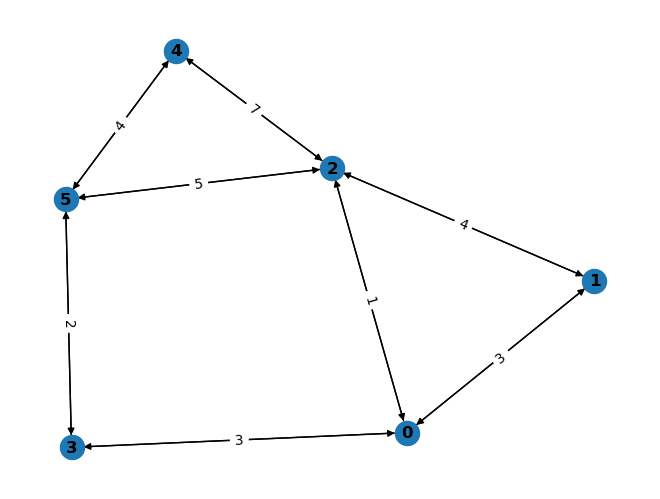

In [71]:
import random
import math
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_adj_matrix(num_nodes, density):
    """
    Генерирует матрицу смежности для ориентированного графа с заданным числом узлов и плотностью связей.
    :param num_nodes: количество узлов в графе
    :param density: плотность связей в графе (от 0 до 1)
    """
    min, max = int(input("Введите мин значение для пути: ")), int(input("Введите макс значение для пути: "))
    
    # Создаем пустую матрицу смежности
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    
    # Заполняем матрицу смежности ребрами
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random.random() < density:
                weight = random.randint(min, max)
                adj_matrix[i][j] = weight
    
    return adj_matrix

question = int(input("1 - для генерации матрицы смежности,\n2 - для вызова из файла: "))
if question == 1:
    adj_matrix = generate_adj_matrix(int(input("Введите количество вершин: ")), 0.6)
else:
    with open("sources/matrix1.txt", "r") as f: 
        adj_matrix = []
        for str in f:
            adj_matrix.append(list(map(int, str.split())))

# Выводим матрицу смежности на экран
print("Матрица смежности:")
for row in adj_matrix:
    print(row)
    
#Выводим граф на экран
G = nx.from_numpy_matrix(np.matrix(adj_matrix), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
edge_weight = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_weight)
plt.show()

# Алгоритм Флойда-Уоршелла

In [90]:
def Floyd(adj_matrix, start, end):
    matrix = copy.deepcopy(adj_matrix)
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf
    
    def get_path(P, u, v):
        path = [u]
        while u != v:
            u = P[u][v]
            path.append(u)

        return path
    
    N = len(matrix)                                 # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]       # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = matrix[i][k] + matrix[k][j]
                if matrix[i][j] > d:
                    matrix[i][j] = d
                    P[i][j] = k     # номер промежуточной вершины при движении от i к j
                    
    min_path = get_path(P, end, start)
    min_dist = math.inf
    if min_path:
        min_dist = 0
        for i in range(len(min_path)-1):
            min_dist += matrix[min_path[i]][min_path[i+1]]
        print("min distance is ",min_dist)
                    
    return min_path

print(Floyd(adj_matrix, 0, 4))

min distance is  8
[4, 2, 0]


### Алгоритм Дейкстры

In [89]:
def dijkstra(adj_matrix, start, end):

    matrix = copy.deepcopy(adj_matrix)

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf

    def arg_min(T, checked_peaks):
        amin = -1
        m = math.inf  # максимальное значение
        for i, t in enumerate(T):
            if t < m and i not in checked_peaks:
                m = t
                amin = i

        return amin

    len_matrix = len(matrix)  # число вершин в графе
    min_dist_to_peak = [math.inf] * len_matrix  # последняя строка таблицы

    cur_peak = start  # стартовая вершина (нумерация с нуля)
    checked_peaks = {cur_peak}  # просмотренные вершины
    min_dist_to_peak[cur_peak] = 0  # нулевой вес для стартовой вершины
    optim_edges = [0] * len_matrix  # оптимальные связи между вершинами

    while cur_peak != -1:  # цикл, пока не просмотрим все вершины
        for j, dw in enumerate(matrix[cur_peak]):  # перебираем все связанные вершины с вершиной cur_peak
            if j not in checked_peaks:  # если вершина еще не просмотрена
                weight = min_dist_to_peak[cur_peak] + dw
                if weight < min_dist_to_peak[j]:
                    min_dist_to_peak[j] = weight
                    optim_edges[j] = cur_peak  # связываем вершину j с вершиной cur_peak

        cur_peak = arg_min(min_dist_to_peak, checked_peaks)  # выбираем следующий узел с наименьшим весом
        if cur_peak >= 0:  # выбрана очередная вершина
            checked_peaks.add(cur_peak)  # добавляем новую вершину в рассмотрение

    print("min distance is ",min_dist_to_peak[end])

    # формирование оптимального маршрута:
    min_path = [end]
    while end != start:
        end = optim_edges[min_path[-1]]
        min_path.append(end)
    
    return min_path


print(dijkstra(adj_matrix, 0, 4))

min distance is  8
[4, 2, 0]


### Алгоритм Беллмана-Форда

In [92]:
def bellman_ford(adj_matrix, start, end):
    matrix = copy.deepcopy(adj_matrix)
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and adj_matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
    lambdas = []
    labels = []
    n = len(matrix)
    for i in range(n):
        lambdas.append(math.inf)
    lambdas[start] = 0

    for k in range(n):
        for i in range(n):
            for j in range(n):
                labels.append(lambdas[j] + matrix[j][i])
            lambdas[i] = min(labels)
            labels.clear()

    return lambdas[end]

print(bellman_ford(adj_matrix, 0, 4))

8


### Алгоритм Джонсона

## Вывод